#**평가 (Evaluation)**

파이썬 머신러닝 완벽가이드 pg.145(163)~180(198)

---
- 정확도

- 오차 행렬

- 정밀도와 재현율
 - 정밀도/재현율 트레이드오프
 - 정밀도와 재현율의 맹점

- F1 스코어

- ROC 곡선과 AUC

- 피아 인디언 당뇨병 예측 (실습)


---



###**정확도 (Accuracy)**

= 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

- 정확도 평가 지표는 불균형한(imbalanced, 특정 레이블값의 데이터가 너무 많거나 너무 적은) 레이블 데이터 세트에서는 성능 수치로 부적절함. 특히 레이블값이 이진 분류일때 부적절함. 여러가지 다른 분류 지표들과 함께 적용하여 ML 모델 성능을 평가해야함.

In [426]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [427]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

In [428]:
# Null값 처리하는 함수, 불필요한 피처 제거하는 함수, 문자열 카테고리 피처를 레이블 인코딩해주는 함수를 각각 생성하여 데이터의 전처리를 전체적으로 호출하는 함수 생성하기

# Null 처리 함수, fillna()
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return(df)

# 머신러닝 알고리즘에 불필요한 피처 제거하는 함수, drop_features()
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행하는 함수, format_features()
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출. transform_features()
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [429]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는:{0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는:0.7877


<ipython-input-428-28ac3d6c184e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-428-28ac3d6c184e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [430]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [431]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예특을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예특을 0으로 하여도 정확도는:0.900


###**오차행렬 (confusion matrix)**

- 이진 분류 예측 오류와 더불어, 어떤 유형의 예측 오류가 발생하고 있는지 나타냄.

- confusion_matrix( )

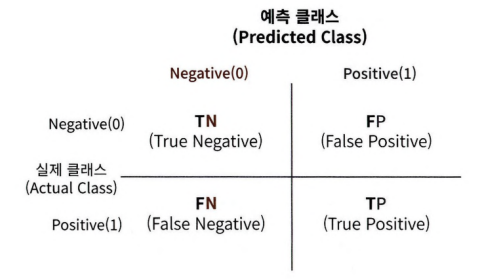

- 앞문자 True/False: 예측값과 실제값이 같은가/틀린가를 의미

   뒤문자 Negative/Positive: 예측 결과 값이 부정(0)/긍정(1)을 의미

- confusion_matrix로 출력된 오차 행렬은 ndarray 형태. FN값은 array[0,1]로 출력.


In [432]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

- 정확도 (accuracy) = (TN + TP) / (TN + FP + FN + TP)
   
   - 예측 결과와 실제 값이 동일한 건수/전체 데이터 수
   - 불균형한 이진 분류 데이터 세트에서는 Positive 건수가 매우 작기 때문에 Negative로 예측하는 경향이 더 강해져, TN은 매우 커지고, TP, FN, FP가 매우 작아짐. 따라서 정확도만으론 Positive에 대한 예측 정확도를 파악하지 못한 채 Negative에 대한 예측 정확도만 매우 높게 나타나는 수치적 판단 오류가 발생함.
   - accuracy_score( )

- 정밀도 (precision) = TP / (FP + TP)
   - Positive 예측을 한 대상 중에 실제값이 Positive로 일치한 데이터의 비율. Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표. 다른 말로 '양성 예측도'.
   - FP(예측 positive, 결과 false)를 낮추는 데에 초점을 맞춤. 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단했을 때 업무 상 큰 영향이 발생하는 경우(예: 스팸메일 여부 판단 모델)에 더 중요한 지표.  
   - precision_score( )

- 재현율 (recall) = TP / (FN + TP)
   - 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율. 다른 말로 '민감도(Sensitivity)', 'TPR(True Positive Rate)'.
   - FN(예측 negative, 결과 false)를 낮추는 데에 초점을 맞춤. 실제 Positive 양성인 데이터 예측을 Negative 음성으로 잘못 판단했을 때 업무 상 큰 영향이 발생하는 경우(예: 금융 사기 적발 모델, 암 판단 모델)에 더 중요한 지표.
   - 정밀도와 재현율은 상호보완적인 평가 지표. 가장 좋은 평가는 두 개 모두 높은 수치를 나타내는 경우.
   - recall_score( )


In [433]:
# <confusion matrix, accuracy, precision, recall등 평가를 한꺼번에 호출하는 get_clf_eval() 함수>

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [434]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 평가 수행.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

<ipython-input-428-28ac3d6c184e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-428-28ac3d6c184e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

LogisticRegression(solver='liblinear')

In [435]:
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


- 정밀도/재현율 트레이드오프 (Trade-off):

   정밀도 또는 재현율이 특별히 강조되어야 할 경우, 수치를 높이기 위해 분류의 결정 임계값(Threshold)을 조정하여 수치를 높일 수 있음.

**# predict_proba( )**

- 개별 클래스 예측 확률을 ndarray m x n (m: 입력 테스트 데이터 세트의 표본 개수, n: 클래스 값 유형) 형태로 반환.

- predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API. predict()는 predict_proba() 호출결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정함.


In [436]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출:\n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출:
 [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [437]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**# Binarizer( )**

In [438]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer을 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


predict()가 predict_proba()에 기반함을 확인.

In [439]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤.
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 되는데, 확률을 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True값이 많아져서 재현율up, 정밀도down.

In [440]:
# 임곗값을 0.4부터 0.6까지 0.05씩 증가시키며 평가지표 조사

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


**# precision_recall_curve( )**


   입력값: 실제 클래스값 배열, Positive 칼럼의 예측 확률 배열

  반환값: 임계값별 정밀도 값(precisions), 재현율 값(recalls)을 각각 배열 ndarray로 반환.


In [441]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


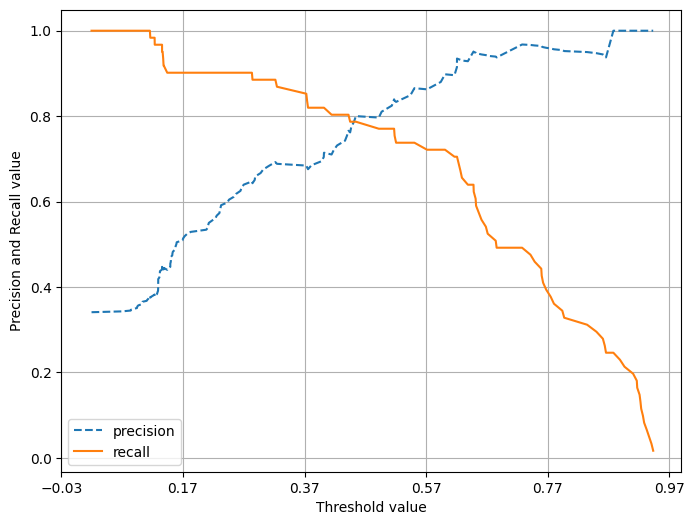

In [442]:
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값을 각각 plot으로 수행. 정밀도는 점선으로 표시.
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0: threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

  # threshold값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.2),2))

  # X축, Y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

- 정밀도와 재현율의 맹점: 극단적인 수치 조작 (숫자 놀음에 불과)
   - 정밀도가 100% 되는 방법: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측.
   - 재현율이 100%가 되는 방법: 모든 환자를 Positive로 예측.

###**F1 스코어 (score)**

- 정밀도와 재현율이 한쪽으로 치우치지 않을 때 상대적으로 높은 값을 가짐.
- f1_score( )

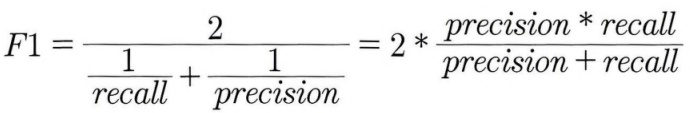

In [443]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어:{0:.4f}'.format(f1))

F1 스코어:0.7966


In [444]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 score 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213, F1:0.8000


F1 스코어는 임계값이 0.6일때 제일 좋음. 하지만, 이 때 재현율이 크게 감소하고 있으니 주지해야함.

###**ROC곡선과 AUC**


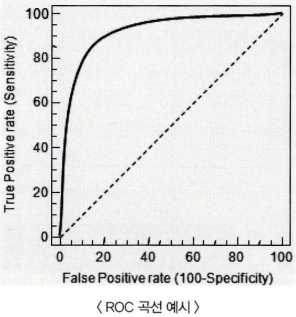


- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선. 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용됨.
  - roc_curve( )
  
   입력값: 실제 클래스 값 array, predict_proba( )의 반환값 array에서 Positive 칼럼의 예측확률

   반환값: FPR값 array형태, TPR값 array형태, thresholds값 array형태

- 개념:
   - FPR = FP / (FP + TN)
     - FPR을 0으로 만들려면 임계값을 1로 지정. 아예 positive으로 예측하지 않기 때문에 FP=0
     - FPR을 1로 만들려면 임계값을 0으로 지정. 다 positive으로 예측. 아예 negative 예측이 없기 때문에 TN=0, FPR=1

   - TPR = TP / ( FN + TP) = 재현율, 민감도 -> 양성인 실제값이 정확히 예측되어야하는 수준

   - TNR = TN / ( FP + TN ) = 1 - FPR = 특이성 -> 음성인 실제값이 정확히 예측되어야하는 수준


- AUC: ROC 곡선의 하단 면적. 1에 가까울수록 (ROC곡선이 직사각형 모양에 가까울수록) 좋은 수치. 좋은 수치를 얻기 위해선 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건. 보통의 분류는 0.5 이상의 AUC값을 가짐.

   - roc_auc_score(y_test, pred_proba)

In [445]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5-step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의설정됨. 이를 제외하기 위해 np.arange는 1부터 시작.
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index], 2))

# 5-step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임계값 별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임계값 별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임계값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값 별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값 별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


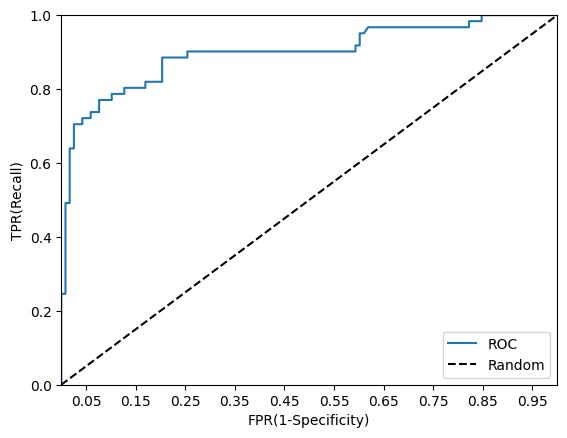

In [446]:
# ROC 곡선 시각화
def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값에 따른 FPR, TPR값을 반환받음.
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1],[0,1], 'k--', label='Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [447]:
# 타이타닉 생존자 예측 로지스틱 회귀모델의 ROC AUC 값 구하기
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값:{0:.4f}'.format(roc_score))

ROC AUC값:0.8987


In [448]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

###**피마 인디언 당뇨병 예측 (Pima Indians Diabetes) (실습)**




피마 인디언 당뇨병 데이터 세트는 다음 피처로 구성돼 있다.
- Pregnancies： 임신 횟수
- Glucose： 포도당 부하 검사 수치
- BloodPressure： 혈압(mm Hg)
- SkinThickness： 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin： 혈청 인슐린(mu U/ml)
- BMI： 체질량지수(체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction： 당뇨 내력 가중치 값
- Age： 나이
- Outcome： 클래스 결정 값(0또는 1)


In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [450]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값은 없고, 피처의 타입은 모두 숫자형. 별도의 인코딩 불필요.

In [451]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출.
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 밒 평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC:0.8083


전체 데이터의 65%가 negative이므로 정확도보단 재현율 성능에 초점을 맞추자. 임계값별 정밀도와 재현율 값의 변화를 확인해보자.

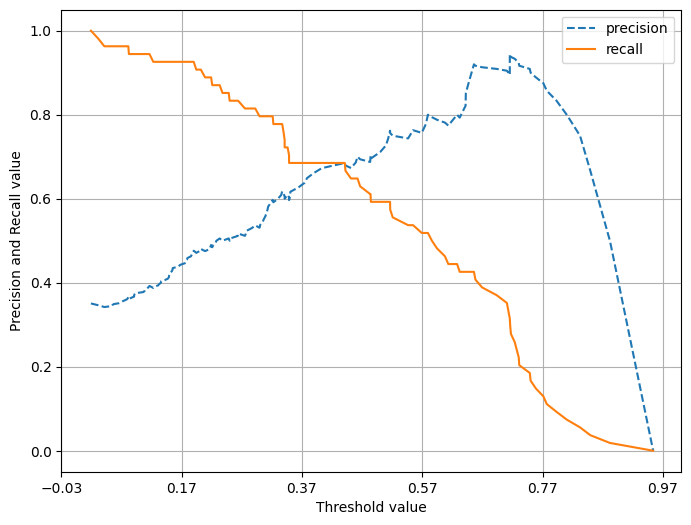

In [452]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

정밀도와 재현율이 어느정도 균형이 맞은 임계값은 약 0.42다. 그러나, 이때 두 지표의 값은 여전히 낮다. 임계값을 인위적으로 조작하기 전에 다시 데이터값을 점검해본다.

In [453]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


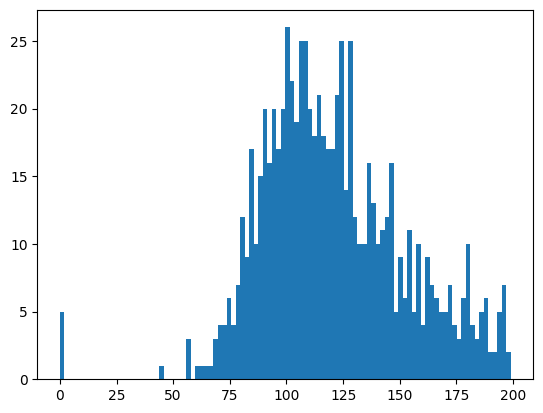

In [454]:
plt.hist(diabetes_data.Glucose, bins=100)
plt.show()

min( )의 값이 0으로 되어있는 피처가 상당히 많다. Glucose 피처의 히스토그램을 확인해보니 0값이 꽤 존재한다. min( )값이 0인 피처에 대해 0값이 전체 데이터의 몇 퍼센트를 차지하는지 알아보자.

In [455]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


위 피처의 0값을 평균값으로 대체하자.

In [456]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

0값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환하고, 이후에 다시 학습/테스트 데이터세트로 나누어 로지스틱 회귀를 적용해 성능 평가 지표를 확인해보자.

In [457]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


성능 수치가 일정 수준 개선되었지만, 재현율 수치는 개선이 필요해보인다. 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서 평가 지표의 값 변화를 출력해보자.

In [461]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3


InvalidParameterError: The 'y_score' parameter of roc_auc_score must be an array-like. Got None instead.

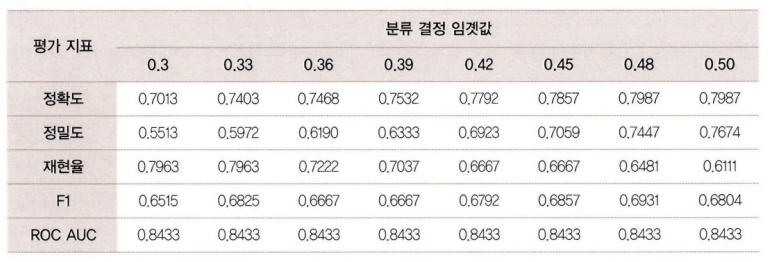

임계값이 0.33일때 재현율이 0.7963으로 높지만 정밀도와 정확도를 희생한 극단적인 선택. 임계값 0.48일때 전체적인 성능평가지표를 유지하면서 재현율이 약간 향상된 좋은 임계값으로 보임. Binarizer 클래스를 이용하여 임계값이 0.48일때 평가지표를 구해보자.

In [459]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
